# Pruebas de corridas

Son pruebas estadísticas no paramétricas para verificar la aleatoriedad de datos. Utiliza series de datos para decidir si son aleatorios o no.

Una **corrida** se define como una serie de eventos similares. El número de tales eventos es la duración de la corrida.

#### Ejemplo: 

En un volado,
    
$$a, s, s, a, a, a, s, a ,s, s$$

¿Cuántas corridas hay?

#### Ejemplo: 

In [1]:
l = [1, 3, 9, 8, 0, 4, 6, 5, 2, 7]

In [2]:
m = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

Hay varias formas de definir corridas, sin embargo, en todos los casos la formulación debe producir una secuencia dicotómica de valores. En nuestro caso, los valores por encima de la mediana se tratan como positivos y los valores por debajo de la mediana como negativos. Una corrida se define como una serie de valores consecutivos positivos o negativos.

El primer paso en la prueba de corridas es contar el número de corridas en la secuencia de datos.

Formulamos entonces la hipótesis nula y alternativa:

$H_0:$ La secuencia se produjo de forma aleatoria.

$H_1:$ La secuencia no se produjo de forma aleatoria.

Usamos el estadistico $Z$ como prueba:

$$Z = \frac{R - \bar{R}}{S_{R}}$$

donde $R$ es el número de corridas observadas, $\bar{R}$, definido como:

$$\bar{R}=\frac{2n_1 n_2}{n_1 + n_2} + 1$$

es el número de corridas esperadas. Y la desviación estándar del número de corridas es:

$$S_R^2 = \frac{2n_1 n_2 (2n_1 n_2 - n_1 - n_2)}{(n_1+n_2)^2 (n_1 + n_2 - 1)}$$

Y $n_1$ y $n_2$ son los números de valores positivos y negativos de la serie.

Entonces comparamos el valor del estadístico $Z$ calculado con el $Z_{crítico}$  para un nivel de confianza dado ($Z_{crítico} = 1.96$ para un nivel de confianza del 95%). La hipótesis nula se rechaza, es decir, se declara que los números no son aleatorios si $| Z |> Z_{crítico}$.

#### Para hacer un programa que haga la prueba de corridas

In [3]:
import random 
import math 
from statistics import mean, median
from matplotlib.pyplot import *

In [25]:
l= [946,1058,1133,869,927,742,1113,665,955,1288,1074,838,815,910,1193,
    1386,955,1187,891,1302,867,837,1138,868,969,737,1143,947,763,1029]

In [8]:
# Esta funcion implementa una prueba de corridas
def prueba_corridas(l):
    
    l_median = mean(l)  # Hacemos la prueba respecto a la media/mediana
    
    R, n1, n2 = 1, 0, 0   # iniciamos los contadores
        
    for i in range(len(l)):    
        
        # Aumentamos R cuando 2 entradas están una arriba y otra abajo de la media/mediana:
        if (l[i] >= l_median and l[i-1] < l_median) or (l[i] < l_median and l[i-1] >= l_median):
            R += 1
        # Contamos las que están arriba y las que están abajo
        if(l[i]) >= l_median:
            n1 += 1
        else:
            n2 += 1   
    # calculamos los parámetros y el estadistico
    R_exp = ((2*n1*n2)/(n1+n2))+1
    stan_dev = math.sqrt((2*n1*n2*(2*n1*n2-n1-n2))/(((n1+n2)**2)*(n1+n2-1))) 
  
    z = (R - R_exp)/stan_dev 
  
    return R, n1, n2, R_exp, z, stan_dev 

In [9]:
R = prueba_corridas(l)[0]
n1 = prueba_corridas(l)[1]
n2 = prueba_corridas(l)[2]
R_exp = abs(prueba_corridas(l)[3])
Z = abs(prueba_corridas(l)[4]) 
stan_dev = abs(prueba_corridas(l)[5])

print('Estadistico = ', Z)
print('  R = ', R, '  R_exp = ', R_exp, '\n n1 = ', n1, '\n n2 = ', n2, '\nVarianza = ', stan_dev**2)

Estadistico =  1.3956221530306299
  R =  19   R_exp =  15.4 
 n1 =  12 
 n2 =  18 
Varianza =  6.653793103448275


### Ejercicio:

* Completar la función para que imprima todas las salidas de interés.
* Desordenar la lista y volver a aplicar la prueba de corridas. Comparar el resultado.
* Repetir el ejercicio con la lista l_1

In [43]:
random.shuffle(l)
print(l)
R = prueba_corridas(l)[0]
n1 = prueba_corridas(l)[1]
n2 = prueba_corridas(l)[2]
R_exp = abs(prueba_corridas(l)[3])
Z = abs(prueba_corridas(l)[4]) 
stan_dev = abs(prueba_corridas(l)[5])

print('Estadistico = ', Z)
print('  R = ', R, '  R_exp = ', R_exp, '\n n1 = ', n1, '\n n2 = ', n2, '\nVarianza = ', stan_dev**2)

[1058, 1029, 955, 1187, 891, 947, 815, 1113, 955, 742, 838, 946, 1288, 910, 1193, 927, 737, 969, 1386, 867, 665, 1302, 869, 868, 1074, 1133, 1138, 763, 837, 1143]
Estadistico =  0.6202765124580576
  R =  17   R_exp =  15.4 
 n1 =  12 
 n2 =  18 
Varianza =  6.653793103448275


In [10]:
l_1 = [0.809, 0.042,  0.432,  0.538,  0.225,  0.88,  0.688,  0.772,  0.036,  0.854, 0.397,  0.268,  0.821,  0.897,  
     0.07,  0.721,  0.087,  0.35,  0.779,  0.482, 0.136,  0.855,  0.453,  0.197,  0.444,  0.799,  0.809,  0.691,  
     0.545,  0.857, 0.692,  0.055,  0.348, 0.373,  0.436,  0.29,  0.015,  0.834,  0.599,  0.724,  0.564,  0.709,  
     0.946,  0.754,  0.677,  0.128,  0.012,  0.498,  0.6,  0.913]

In [47]:
R = prueba_corridas(l_1)[0]
n1 = prueba_corridas(l_1)[1]
n2 = prueba_corridas(l_1)[2]
R_exp = abs(prueba_corridas(l_1)[3])
Z = abs(prueba_corridas(l_1)[4]) 
stan_dev = abs(prueba_corridas(l_1)[5])

print('Estadistico = ', Z)
print('  R = ', R, '  R_exp = ', R_exp, '\n n1 = ', n1, '\n n2 = ', n2, '\nVarianza = ', stan_dev**2)

Estadistico =  1.3922411963646792
  R =  21   R_exp =  25.84 
 n1 =  27 
 n2 =  23 
Varianza =  12.085420408163268


In [48]:
l_2 = []
lamda = 2

In [49]:
for i in range(1000):
    l_2.append(random.expovariate(lamda))

In [51]:
print(l_2)

[2.73542278958644, 1.5848676052619206, 0.7187025996701878, 0.9497018232280301, 0.2431150483275396, 0.05497634380529555, 1.3636028387583508, 0.15359752320952533, 0.3917745501985351, 0.009474082097331069, 1.6471845950722033, 0.18970469765045767, 0.28729922939282176, 0.010346970134411404, 0.057188958775443034, 0.032353287159277315, 2.4392004007623647, 1.1098306797752704, 0.7439808950860883, 0.30583924690073006, 0.008678652409140755, 0.2345769266402827, 0.023721657128644765, 0.13324898498894727, 0.9184779701054248, 0.5841827238190115, 0.6100514735123629, 0.6397339144966614, 0.032536341989164545, 0.3629351035200085, 0.48650488992004187, 0.4218699279429692, 1.7302717071691964, 0.5398281166669987, 0.20359386397665774, 0.7168271809694647, 0.28278623085339144, 0.2003671887878445, 0.15201581402887052, 0.07704522988116293, 0.3575159915253407, 0.30574103374960593, 0.18549714743635504, 0.011093155219855806, 0.537637308928589, 0.09752501392250397, 0.19659240937380276, 0.1981024899089247, 0.216236570

In [52]:
mean(l_2)

0.5128537834624324

(array([459., 277., 130.,  66.,  28.,  24.,   8.,   2.,   4.,   2.]),
 array([5.57107307e-04, 3.34058399e-01, 6.67559690e-01, 1.00106098e+00,
        1.33456227e+00, 1.66806357e+00, 2.00156486e+00, 2.33506615e+00,
        2.66856744e+00, 3.00206873e+00, 3.33557002e+00]),
 <a list of 10 Patch objects>)

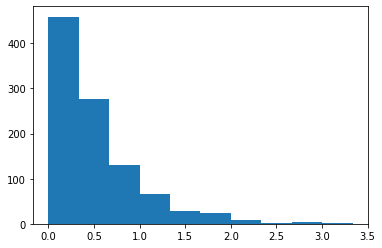

In [53]:
hist(l_2)

In [55]:
R = prueba_corridas(l_2)[0]
n1 = prueba_corridas(l_2)[1]
n2 = prueba_corridas(l_2)[2]
R_exp = abs(prueba_corridas(l_2)[3])
Z = abs(prueba_corridas(l_2)[4]) 
stan_dev = abs(prueba_corridas(l_2)[5])

print('Estadistico = ', Z)
print('  R = ', R, '  R_exp = ', R_exp, '\n n1 = ', n1, '\n n2 = ', n2, '\nVarianza = ', stan_dev**2)

Estadistico =  0.2206085379459871
  R =  475   R_exp =  471.718 
 n1 =  379 
 n2 =  621 
Varianza =  221.32604356756755


In [56]:
l_3=[]

In [57]:
for i in range(100):
    l_3.append(math.sin(i))

(array([20.,  9.,  8.,  6.,  6.,  8.,  6.,  7.,  9., 21.]),
 array([-9.99990207e-01, -8.00000000e-01, -6.00009793e-01, -4.00019587e-01,
        -2.00029380e-01, -3.91732217e-05,  1.99951033e-01,  3.99941240e-01,
         5.99931447e-01,  7.99921653e-01,  9.99911860e-01]),
 <a list of 10 Patch objects>)

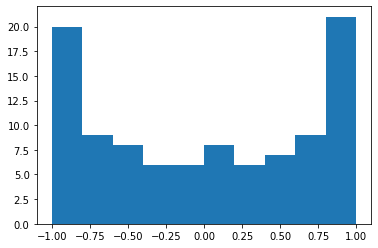

In [58]:
hist(l_3)

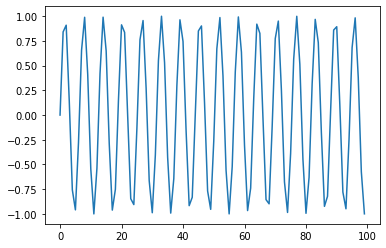

In [59]:
plot(l_3)

In [60]:
print(l_3)

[0.0, 0.8414709848078965, 0.9092974268256817, 0.1411200080598672, -0.7568024953079282, -0.9589242746631385, -0.27941549819892586, 0.6569865987187891, 0.9893582466233818, 0.4121184852417566, -0.5440211108893698, -0.9999902065507035, -0.5365729180004349, 0.4201670368266409, 0.9906073556948704, 0.6502878401571168, -0.2879033166650653, -0.9613974918795568, -0.750987246771676, 0.14987720966295234, 0.9129452507276277, 0.8366556385360561, -0.008851309290403876, -0.8462204041751706, -0.9055783620066239, -0.13235175009777303, 0.7625584504796027, 0.956375928404503, 0.27090578830786904, -0.6636338842129675, -0.9880316240928618, -0.404037645323065, 0.5514266812416906, 0.9999118601072672, 0.5290826861200238, -0.428182669496151, -0.9917788534431158, -0.6435381333569995, 0.2963685787093853, 0.9637953862840878, 0.7451131604793488, -0.158622668804709, -0.9165215479156338, -0.8317747426285983, 0.017701925105413577, 0.8509035245341184, 0.9017883476488092, 0.123573122745224, -0.7682546613236668, -0.953752

In [61]:
R = prueba_corridas(l_3)[0]
n1 = prueba_corridas(l_3)[1]
n2 = prueba_corridas(l_3)[2]
R_exp = abs(prueba_corridas(l_3)[3])
Z = abs(prueba_corridas(l_3)[4]) 
stan_dev = abs(prueba_corridas(l_3)[5])

print('Estadistico = ', Z)
print('  R = ', R, '  R_exp = ', R_exp, '\n n1 = ', n1, '\n n2 = ', n2, '\nVarianza = ', stan_dev**2)

Estadistico =  3.618320729006646
  R =  33   R_exp =  51.0 
 n1 =  50 
 n2 =  50 
Varianza =  24.747474747474744
